# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

True

In [5]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [6]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [7]:
# Fetch the SPY - S&P 500 ETF Trust news articles
spy_headlines = newsapi.get_everything(q="Stock Market" and "Apple" and  "AAPL" and "Microsoft" and "MSFT" and "CIEN" and "LITE" and "UI" and "Ubiquiti" and "ANET" and "ACIA" and "TMUS",
                                           language="en",
                                           sort_by="relevancy")
spy_headlines

{'status': 'ok',
 'totalResults': 88,
 'articles': [{'source': {'id': None, 'name': 'Yahoo Entertainment'},
   'author': 'Priya Nigam',
   'title': 'Analyst Still Bullish On AT&T Despite Leverage, Dividend Concerns',
   'description': "AT&T Inc's (NYSE: T) share price seems to price in only negative news, including investor concerns around T-Mobile Us Inc (NASDAQ: TMUS) taking share...",
   'url': 'https://finance.yahoo.com/news/analyst-still-bullish-t-despite-165607700.html',
   'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/arJ.p1OvK6cCjU0WOcjnSg--~B/aD00MDA7dz02MDA7YXBwaWQ9eXRhY2h5b24-/https://media.zenfs.com/en/Benzinga/7c228f2eb94a33f76a96b682a4727613',
   'publishedAt': '2020-12-21T16:56:07Z',
   'content': 'After a true annus horribilus, were all ready for better times. The US equity strategy team at Goldman Sachs, led by David Kostin, sees those better time ahead, and in the near-term. The team is pred… [+7652 chars]'},
  {'source': {'id': None, 'name': 'Seeking Alpha'},
   '

In [15]:
# Fetch the XLF - Financial Sector news articles
finance_headlines = newsapi.get_everything(q="American Financial Sector" and "Bank of America" and "JP Morgan" and "Wells Fargo" and "Morgan Stanley" and "Berkshire Hathaway" and "Goldman Sachs" and "Charles Schwab" and "Fidelity",
                                           language="en",
                                           sort_by="relevancy")
finance_headlines

{'status': 'ok',
 'totalResults': 2116,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': "Jabra's Elite 85t wireless earbuds drop to $170 at Amazon",
   'description': 'Don’t worry if you missed out on a pair of wireless earbuds this holiday season, especially if you want an alternative to some of the usual options. Amazon is selling Jabra’s Elite 85t earbuds for $170, or $60 below the usual price, after a coupon automatical…',
   'url': 'https://www.engadget.com/jabra-elite-85t-amazon-sale-190352506.html',
   'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2021-01%2Ffef59f80-4d29-11eb-bf7f-cd24b60f47df&client=amp-blogside-v2&signature=f0defe6ea05e88a24c95fe40962f8b6723fc5e2a',
   'publishedAt': '2021-01-02T19:03:52Z',
   'content': 'Jabra’s earbuds are part of a fiercely competitive space, but they do stand out i

In [14]:
# Fetch the XLK - Tecnology Sector news articles
tech_headlines = newsapi.get_everything(q="American Technology Sector" and "technology distruption" and  "cybersecurity" and "semiconductors" and "Apple" and "Microsoft" and "AAPL" and "MSFT" and "Visa" and "Nvidia" and "NDVA" and "Paypal" and "Salesforce" and "CRM",
                                           language="en",
                                           sort_by="relevancy")
tech_headlines

{'status': 'ok',
 'totalResults': 1242,
 'articles': [{'source': {'id': None, 'name': 'Entrepreneur'},
   'author': 'Pritom Das',
   'title': 'Three Key Trends Leading the CRM Revolution',
   'description': 'A great customer experience helps companies to get more leads, convert more of them into paying customers and get them to refer more people. These trends are making it easier to do all that and more.',
   'url': 'https://www.entrepreneur.com/article/361769',
   'urlToImage': 'https://assets.entrepreneur.com/content/3x2/2000/1608150831-GettyImages-1186931178.jpg',
   'publishedAt': '2020-12-25T14:00:00Z',
   'content': 'December\r\n25, 2020\r\n4 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIn most industries, the products and services offered by the different market players are of similar qu… [+4095 chars]'},
  {'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Mike Butcher',
   'title': 'Bristol’s Brightpearl raises $33M Series C r

In [48]:
# Fetch the XTL - Telecom Sector news articles
telecom_headlines = newsapi.get_everything(q="American Telecommunications Sector" and "IRDM" and "5G" and "INSG" and "VIAV" and "CALX" and "MSFT" and "Visa" and "Nvidia" and "NDVA" and "Paypal" and "Salesforce" and "CRM",
                                           language="en",
                                           sort_by="relevancy")
telecom_headlines

{'status': 'ok',
 'totalResults': 1244,
 'articles': [{'source': {'id': None, 'name': 'Entrepreneur'},
   'author': 'Pritom Das',
   'title': 'Three Key Trends Leading the CRM Revolution',
   'description': 'A great customer experience helps companies to get more leads, convert more of them into paying customers and get them to refer more people. These trends are making it easier to do all that and more.',
   'url': 'https://www.entrepreneur.com/article/361769',
   'urlToImage': 'https://assets.entrepreneur.com/content/3x2/2000/1608150831-GettyImages-1186931178.jpg',
   'publishedAt': '2020-12-25T14:00:00Z',
   'content': 'December\r\n25, 2020\r\n4 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nIn most industries, the products and services offered by the different market players are of similar qu… [+4095 chars]'},
  {'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Mike Butcher',
   'title': 'Bristol’s Brightpearl raises $33M Series C r

In [11]:
# Fetch the XLU - Utilities Sector news articles
utility_headlines = newsapi.get_everything(q="American Utilities Sector" and "NextEra" and "NEE" and "DUK" and "Duke Energy" and "Green Energy" and "SO" and "Dominion Energy" and "American Electric Power" and "Visa" and "Exelon" and "Sempra Energy" and "Xcel Energy" and "Eversource Energy" and "Public Service Enterprise" and "ConEdison",
                                           language="en",
                                           sort_by="relevancy")
utility_headlines

{'status': 'ok',
 'totalResults': 5,
 'articles': [{'source': {'id': None, 'name': 'Gothamist'},
   'author': 'Sydney Pereira',
   'title': 'Powerful Winds And Heavy Rain Leave Thousands Without Power On Christmas Morning',
   'description': 'The Long Island City Con Edison facility on April 25th, 2020.\n \n\nHeavy rain and winds knocked down trees and power lines. [ more › ]',
   'url': 'http://gothamist.com/news/powerful-winds-and-heavy-rain-leave-thousands-without-power-christmas-morning',
   'urlToImage': 'https://cms.prod.nypr.digital/images/316071/fill-1200x650/',
   'publishedAt': '2020-12-25T16:22:15Z',
   'content': 'Heavy rain and wind knocked out power for thousands in New York and New Jersey on Christmas morning.\r\nAbout 35,000 households were still out of power across New York City, Westchester, Long Island, a… [+1853 chars]'},
  {'source': {'id': None, 'name': 'CleanTechnica'},
   'author': 'Zachary Shahan',
   'title': '100% EV Roadmap For 2030 For USA Published By ZETA

In [16]:
# Fetch the XLI - Industrial Sector news articles
indust_headlines = newsapi.get_everything(q="American Industrial Sector" and "HON" and "Honeywell International" and "UNP" and "Union Pacific Corp" and "UPS" and "United Postal Service" and "Boeing" and "Raytheon" and "RTX" and "MMM" and "3M" and "Caterpillar Inc" and "GE" and "General Electric" and "LMT" and "Lockheed Martin" and "DE" and "John Deere",
                                           language="en",
                                           sort_by="relevancy")
indust_headlines

{'status': 'ok',
 'totalResults': 293,
 'articles': [{'source': {'id': None, 'name': 'MarketWatch'},
   'author': 'Joy Wiltermuth',
   'title': 'Market Extra: Corporate debt boom resumes as 2021 kicks off',
   'description': 'Home Depot and John Deere are among a parade of U.S. investment-grade companies that seized on the first trading day in January to borrow in the corporate bond market.',
   'url': 'https://www.marketwatch.com/story/corporate-debt-boom-resumes-as-2021-kicks-off-11609811974',
   'urlToImage': 'https://images.mktw.net/im-280602/social',
   'publishedAt': '2021-01-05T01:59:00Z',
   'content': 'The training wheels came off without a hitch.The lapse of the Federal Reserves inaugural corporate debt-buying program at years end didnt hold up the parade of highly rated companies from borrowing i… [+3156 chars]'},
  {'source': {'id': None, 'name': 'CNET'},
   'author': 'Shara Tibken',
   'title': "John Deere makes me feel like I'm home on the farm during virtual CES 2021 - C

In [17]:
# Fetch the XLV - Healthcare Sector news articles
health_headlines = newsapi.get_everything(q="American Healthcare Sector" and "JNJ" and "Johnson & Johnson" and "UnitedHealth Group" and "UNH" and "MRK" and "Merck & Co" and "PFE" and "Pfizer" and "ABT" and "Abbott Laboroatories" and "ABBV" and "AbbVie Inc" and "TMO" and "Thermo Fisher" and "Visa" and "Nvidia" and "BMY" and "Bristol-Myers Squibb",
                                           language="en",
                                           sort_by="relevancy")
health_headlines

{'status': 'ok',
 'totalResults': 387,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Reuters Staff',
   'title': 'Bristol Myers sees up to $25 billion a year of new revenue from current drug pipeline - Reuters',
   'description': 'Bristol Myers Squibb said on Monday that its current drug pipeline has the ability to replace up to $25 billion a year in lost revenue from patent expirations by the end of the decade.',
   'url': 'https://www.reuters.com/article/us-bristolmyers-revenue/bristol-myers-sees-up-to-25-billion-a-year-of-new-revenue-from-current-drug-pipeline-idUSKBN29G1CH',
   'urlToImage': 'https://s1.reutersmedia.net/resources_v2/images/rcom-default.png?w=800',
   'publishedAt': '2021-01-11T12:32:00Z',
   'content': 'By Reuters Staff\r\nNEW YORK (Reuters) - Bristol Myers Squibb said on Monday that its current drug pipeline has the ability to replace up to $25 billion a year in lost revenue from patent expirations b… [+1488 chars]'},
  {'source': {'

In [22]:
# Fetch the XLE - Energy Sector news articles
energy_headlines = newsapi.get_everything(q="American Energy Sector" and "XOM" and "Exxon Mobil" and "CVX" and "Chevron" and "PSX" and "SLB" and "Schlumberger" and "COP" and "ConcoPhillips" and "Phillips 66" and "EOG" and "EOG Resources" and "MPC" and "Marathon Petrolem" and "KMI" and "Kinder Morgan Inc" and "WMB" and "Willliams Companies Inc" and "VLO" and "Valero Energy Corp",
                                           language="en",
                                           sort_by="relevancy")
energy_headlines

{'status': 'ok',
 'totalResults': 26,
 'articles': [{'source': {'id': None, 'name': 'Forbes'},
   'author': 'Trefis Team, Contributor, \n Trefis Team, Contributor\n https://www.forbes.com/sites/greatspeculations/people/trefis/',
   'title': 'Valero Energy Stock To Remain Below Its Pre-Covid Peak',
   'description': 'Valero Energy Corp stock currently trades at $56 per share and is still down 41% from the beginning of 2020. Valero Energy Corp is an international manufacturer and marketer of transportation fuels and other petrochemical products. VLO stock traded at $83 in …',
   'url': 'https://www.forbes.com/sites/greatspeculations/2021/01/06/valero-energy-stock-to-remain-below-its-pre-covid-peak/',
   'urlToImage': 'https://thumbor.forbes.com/thumbor/fit-in/1200x0/filters%3Aformat%28jpg%29/https%3A%2F%2Fspecials-images.forbesimg.com%2Fimageserve%2F5ff55b23ad18d2e395493287%2F0x0.jpg',
   'publishedAt': '2021-01-06T12:00:00Z',
   'content': 'Close-up of logo for petroleum company Valero 

In [34]:
# Fetch the ETH - Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum",
                                           language="en",
                                           sort_by="relevancy")
ethereum_headlines

{'status': 'ok',
 'totalResults': 1450,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Matt Novak',
   'title': "Ripple Claims Bitcoin Is 'Chinese-Controlled' While Announcing New Lawsuit From SEC",
   'description': 'The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the cryptocurrency company late Monday. Ripple defended its cryptocurrency, known as XRP, as…',
   'url': 'https://gizmodo.com/ripple-claims-bitcoin-is-chinese-controlled-while-annou-1845932148',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/ahh1hzpmuhrh8ybwimab.jpg',
   'publishedAt': '2020-12-22T11:30:00Z',
   'content': 'The Securities and Exchange Commission plans to sue Ripple in federal civil court for selling unregistered securities, according to a news release published online by the crypto

In [35]:
# Fetch the LTC - Litecoin news articles
lite_headlines = newsapi.get_everything(q="litecoin",
                                        language="en",
                                        sort_by="relevancy")
lite_headlines

{'status': 'ok',
 'totalResults': 347,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Reuters Staff',
   'title': 'Cryptocurrency XRP drops 18% after U.S. SEC charges Ripple over offering - Reuters India',
   'description': 'Cryptocurrency XRP tumbled 18% to a one-month low on Wednesday after the U.S. Securities and Exchange Commission (SEC) charged associated blockchain firm Ripple with conducting a $1.3 billion unregistered securities offering.',
   'url': 'https://in.reuters.com/article/us-crypto-currency-ripple-idINKBN28X116',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201223&t=2&i=1545538377&r=LYNXMPEGBM0JQ&w=800',
   'publishedAt': '2020-12-23T09:22:00Z',
   'content': 'By Reuters Staff\r\nFILE PHOTO: Representations of the Ripple, Bitcoin, Etherum and Litecoin virtual currencies are seen on a PC motherboard in this illustration picture, February 14, 2018. REUTERS/Dad… [+301 chars]'},
  {'source': {'id': 'reuters', 'name': 'Re

In [46]:
# Create the S&P 500 sentiment scores DataFrame
spy_sentiments = []

for article in spy_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        spy_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
spy_sent_df = pd.DataFrame(spy_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
spy_sent_df = spy_sent_df[cols]

spy_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-21,"After a true annus horribilus, were all ready ...",0.8779,0.252,0.000,0.748
1,2021-01-08,"WILKES-BARRE, UNITED STATES - 2020/11/27: Shop...",0.5473,0.109,0.000,0.891
2,2020-12-23,T-Mobile (TMUS) closed at $132.23 in the lates...,0.2960,0.084,0.054,0.862
3,2020-12-31,"In the latest trading session, T-Mobile (TMUS)...",0.7184,0.158,0.000,0.842
4,2021-01-07,T-Mobile released preliminary fourth quarter a...,0.3182,0.073,0.000,0.927


In [39]:
# Create the Finance Sector sentiment scores DataFrame
financial_sentiments = []

for article in finance_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        financial_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
financial_sent_df = pd.DataFrame(financial_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
financial_sent_df = financial_sent_df[cols]

financial_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2021-01-02,Jabra’s earbuds are part of a fiercely competi...,0.8820,0.248,0.000,0.752
1,2021-01-19,Rivian has raised $2.65 billion as it prepares...,0.0000,0.000,0.000,1.000
2,2020-12-30,"After the pandemic stole Brooklyn from me, I w...",0.0258,0.049,0.047,0.904
3,2020-12-25,The quality of the CG animation is about what ...,-0.5994,0.000,0.133,0.867
4,2021-01-19,"In a huge breakthrough, a team of researchers ...",0.3182,0.078,0.000,0.922


In [42]:
# Create the Technology Sector sentiment scores DataFrame
technology_sentiments = []

for article in tech_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        technology_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
technology_sent_df = pd.DataFrame(technology_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
technology_sent_df = technology_sent_df[cols]

technology_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-25,"December\r\n25, 2020\r\n4 min read\r\nOpinions...",0.0000,0.000,0.0,1.000
1,2020-12-24,"Brightpearl, which allows retailers to streaml...",0.3400,0.068,0.0,0.932
2,2021-01-07,The ongoing push for social distancing to slow...,0.0000,0.000,0.0,1.000
3,2021-01-14,"DecisionLink, an Atlanta-based company that pr...",0.5994,0.154,0.0,0.846
4,2021-01-21,"Soci, a startup focused on what it calls “loca...",0.7351,0.199,0.0,0.801


In [49]:
# Create the Telecom Sector sentiment scores DataFrame
telecom_sentiments = []

for article in telecom_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        telecom_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
telecom_sent_df = pd.DataFrame(telecom_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
telecom_sent_df = telecom_sent_df[cols]

telecom_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-25,"December\r\n25, 2020\r\n4 min read\r\nOpinions...",0.0000,0.000,0.0,1.000
1,2020-12-24,"Brightpearl, which allows retailers to streaml...",0.3400,0.068,0.0,0.932
2,2021-01-07,The ongoing push for social distancing to slow...,0.0000,0.000,0.0,1.000
3,2021-01-14,"DecisionLink, an Atlanta-based company that pr...",0.5994,0.154,0.0,0.846
4,2021-01-21,"Soci, a startup focused on what it calls “loca...",0.7351,0.199,0.0,0.801


In [50]:
# Create the Utilities Sector sentiment scores DataFrame
utility_sentiments = []

for article in utility_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        utility_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
utility_sent_df = pd.DataFrame(utility_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
utility_sent_df = utility_sent_df[cols]

utility_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-25,Heavy rain and wind knocked out power for thou...,0.0000,0.000,0.000,1.000
1,2021-01-14,"BatteriesPublished on January 14th, 2021 |\r\n...",0.0000,0.000,0.000,1.000
2,2021-01-05,"Hello, communicators:\r\nIts election day for ...",0.4019,0.074,0.000,0.926
3,2021-01-19,"In Martin Luther King Jr.'s 1967 book ""Where D...",0.4019,0.195,0.141,0.664
4,2020-12-21,Can any sense be made of this very expensive I...,0.6553,0.162,0.059,0.779


In [51]:
# Create the Industrial Sector sentiment scores DataFrame
industrial_sentiments = []

for article in indust_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        industrial_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
industrial_sent_df = pd.DataFrame(industrial_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
industrial_sent_df = industrial_sent_df[cols]

industrial_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2021-01-05,The training wheels came off without a hitch.T...,0.0000,0.000,0.000,1.000
1,2021-01-13,Imagine driving this massive tractor and plant...,0.0000,0.000,0.000,1.000
2,2021-01-02,GPS records the combine's precise path through...,0.0772,0.038,0.000,0.962
3,2020-12-26,Ready to fly out of Donald J. Trump Airport in...,0.3182,0.061,0.029,0.909
4,2021-01-05,Here come the droids.\r\nYukai Engineering\r\n...,0.0000,0.000,0.000,1.000


In [54]:
# Create the Healthcare Sector sentiment scores DataFrame
healthcare_sentiments = []

for article in health_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        healthcare_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
healthcare_sent_df = pd.DataFrame(healthcare_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
healthcare_sent_df = healthcare_sent_df[cols]

healthcare_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2021-01-11,By Reuters Staff\r\nNEW YORK (Reuters) - Brist...,0.0000,0.060,0.060,0.881
1,2021-01-04,NEW YORK (Reuters) - Drugmakers including Abbv...,0.4939,0.084,0.000,0.916
2,2021-01-04,NEW YORK (Reuters) - Drugmakers including Abbv...,0.4939,0.084,0.000,0.916
3,2021-01-12,"(Expands reporting credits, no changes to text...",-0.5106,0.120,0.184,0.696
4,2021-01-12,(Reuters) - Swiss drugmaker Novartis paid $650...,0.1779,0.050,0.000,0.950


In [55]:
# Create the Energy Sector sentiment scores DataFrame
energy_sentiments = []

for article in energy_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        energy_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
energy_sent_df = pd.DataFrame(energy_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
energy_sent_df = energy_sent_df[cols]

energy_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2021-01-06,Close-up of logo for petroleum company Valero ...,0.3400,0.099,0.0,0.901
1,2021-01-19,"Technically speaking, the major U.S. benchmark...",0.0000,0.000,0.0,1.000
2,2021-01-12,Editors Note: This is a free edition of The Te...,0.5106,0.102,0.0,0.898
3,2021-01-05,Editors Note: This is a free edition of The Te...,0.5106,0.102,0.0,0.898
4,2021-01-19,"DUBLIN, Jan. 19, 2021 /PRNewswire/ -- The ""But...",0.0000,0.000,0.0,1.000


In [56]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sent_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_sent_df = ethereum_sent_df[cols]

ethereum_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-22,The Securities and Exchange Commission plans t...,0.5267,0.136,0.00,0.864
1,2021-01-05,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.00,0.926
2,2020-12-21,NEW YORK (Reuters) - Total investor inflows in...,0.3612,0.068,0.00,0.932
3,2021-01-04,Ethereum creator Vitalik Buterin.\r\n14 with 1...,0.5256,0.099,0.00,0.901
4,2021-01-04,Bitcoin fizzled in Monday trading as the famou...,-0.2732,0.000,0.06,0.940


In [58]:
# Create the Litecoin sentiment scores DataFrame
litecoin_sentiments = []

for article in lite_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        litecoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
litecoin_sent_df = pd.DataFrame(litecoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
litecoin_sent_df = litecoin_sent_df[cols]

litecoin_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-23,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.0,1.000
1,2020-12-23,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.0,1.000
2,2020-12-29,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.0,1.000
3,2021-01-07,1 with 1 posters participating\r\nThe world's ...,0.5106,0.125,0.0,0.875
4,2020-12-23,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.0,1.000


In [61]:
# Describe the S&P 500 Sentiment
spy_sent_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.414942,0.105737,0.002842,0.891421
std,0.294341,0.076837,0.012388,0.076987
min,0.000000,0.000000,0.000000,0.748000
25%,0.200600,0.057500,0.000000,0.841000
50%,0.421500,0.109000,0.000000,0.888000
75%,0.659550,0.159000,0.000000,0.942500
max,0.877900,0.252000,0.054000,1.000000


In [59]:
# Describe the Finance Sector Sentiment
financial_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.100515,0.047550,0.02205,0.930400
std,0.340439,0.077162,0.03799,0.091066
min,-0.599400,0.000000,0.00000,0.733000
25%,0.000000,0.000000,0.00000,0.913000
50%,0.000000,0.000000,0.00000,0.955000
75%,0.323650,0.073500,0.04950,1.000000
max,0.882000,0.248000,0.13300,1.000000


In [60]:
# Describe the Technology Sector Sentiment
technology_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.295845,0.091100,0.020550,0.888400
std,0.327935,0.075453,0.045571,0.099616
min,-0.226300,0.000000,0.000000,0.681000
25%,0.000000,0.029250,0.000000,0.834750
50%,0.306600,0.083500,0.000000,0.911500
75%,0.532800,0.143000,0.007750,0.958750
max,0.883400,0.248000,0.171000,1.000000


In [62]:
# Describe the Telecom Sector Sentiment
telecom_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.295845,0.091100,0.020550,0.888400
std,0.327935,0.075453,0.045571,0.099616
min,-0.226300,0.000000,0.000000,0.681000
25%,0.000000,0.029250,0.000000,0.834750
50%,0.306600,0.083500,0.000000,0.911500
75%,0.532800,0.143000,0.007750,0.958750
max,0.883400,0.248000,0.171000,1.000000


In [63]:
# Describe the Utilities Sector Sentiment
utility_sent_df.describe()

,compound,positive,negative,neutral
count,5.000000,5.000000,5.000000,5.00000
mean,0.291820,0.086200,0.040000,0.87380
std,0.285776,0.090267,0.061972,0.14797
min,0.000000,0.000000,0.000000,0.66400
25%,0.000000,0.000000,0.000000,0.77900
50%,0.401900,0.074000,0.000000,0.92600
75%,0.401900,0.162000,0.059000,1.00000
max,0.655300,0.195000,0.141000,1.00000


In [64]:
# Describe the Industrial Sector Sentiment
industrial_sent_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.108310,0.04910,0.025000,0.925900
std,0.358915,0.06291,0.052728,0.078351
min,-0.771700,0.00000,0.000000,0.729000
25%,0.000000,0.00000,0.000000,0.905250
50%,0.038600,0.01900,0.000000,0.930000
75%,0.323650,0.08200,0.007250,1.000000
max,0.796400,0.21300,0.199000,1.000000


In [65]:
# Describe the Healthcare Sector Sentiment
healthcare_sent_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.212128,0.083778,0.041667,0.874611
std,0.474885,0.072257,0.078237,0.101465
min,-0.915300,0.000000,0.000000,0.696000
25%,0.000000,0.043250,0.000000,0.799000
50%,0.309150,0.083500,0.000000,0.915000
75%,0.493900,0.112000,0.050500,0.942250
max,0.840200,0.258000,0.292000,1.000000


In [66]:
# Describe the Energy Sector Sentiment
energy_sent_df.describe()

,compound,positive,negative,neutral
count,14.000000,14.000000,14.0,14.000000
mean,0.285557,0.070857,0.0,0.929143
std,0.314143,0.087935,0.0,0.087935
min,0.000000,0.000000,0.0,0.704000
25%,0.000000,0.000000,0.0,0.896500
50%,0.170000,0.049500,0.0,0.950500
75%,0.556575,0.103500,0.0,1.000000
max,0.844200,0.296000,0.0,1.000000


In [67]:
# Describe the Ethereum Sector Sentiment
ethereum_sent_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.135816,0.042158,0.009789,0.948053
std,0.318021,0.060099,0.023273,0.057291
min,-0.381800,0.000000,0.000000,0.845000
25%,0.000000,0.000000,0.000000,0.913500
50%,0.000000,0.000000,0.000000,0.941000
75%,0.435900,0.086500,0.000000,1.000000
max,0.636900,0.155000,0.067000,1.000000


In [68]:
# Describe the Litecoin Sentiment
litecoin_sent_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.212842,0.054947,0.008789,0.936211
std,0.295330,0.066625,0.020893,0.075552
min,-0.273200,0.000000,0.000000,0.767000
25%,0.000000,0.000000,0.000000,0.871500
50%,0.000000,0.000000,0.000000,0.962000
75%,0.518100,0.127500,0.000000,1.000000
max,0.636900,0.178000,0.060000,1.000000


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [69]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rawlricsumner/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rawlricsumner/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
# Expand the default stopwords list if necessary
lem = WordNetLemmatizer()
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [71]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    words = word_tokenize(text)
    #Create a list of the words 
    sw = set(stopwords.words('english'))
    #Convert the words to lowercase
    words = list(filter(lambda x: x.lower(), words))
    #Remove the punctuation
    words = list(filter(lambda y: y not in punctuation, words))
    #Remove the stop words
    words = list(filter(lambda z: z.lower() not in sw, words))
    #Lemmatize Words into root words
    tokens = [lem.lemmatize(word) for word in words]
    
    return tokens

In [74]:
# Create a new tokens column for S&P 500
spy_sent_df['tokens'] = spy_sent_df.text.apply(tokenizer)
spy_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-12-21,"After a true annus horribilus, were all ready ...",0.8779,0.252,0.000,0.748,"[true, annus, horribilus, ready, better, time,..."
1,2021-01-08,"WILKES-BARRE, UNITED STATES - 2020/11/27: Shop...",0.5473,0.109,0.000,0.891,"[WILKES-BARRE, UNITED, STATES, 2020/11/27, Sho..."
2,2020-12-23,T-Mobile (TMUS) closed at $132.23 in the lates...,0.2960,0.084,0.054,0.862,"[T-Mobile, TMUS, closed, 132.23, latest, tradi..."
3,2020-12-31,"In the latest trading session, T-Mobile (TMUS)...",0.7184,0.158,0.000,0.842,"[latest, trading, session, T-Mobile, TMUS, clo..."
4,2021-01-07,T-Mobile released preliminary fourth quarter a...,0.3182,0.073,0.000,0.927,"[T-Mobile, released, preliminary, fourth, quar..."


In [72]:
# Create a new tokens column for Financial Sector
financial_sent_df['tokens'] = financial_sent_df.text.apply(tokenizer)
financial_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-01-02,Jabra’s earbuds are part of a fiercely competi...,0.8820,0.248,0.000,0.752,"[Jabra, ’, earbuds, part, fiercely, competitiv..."
1,2021-01-19,Rivian has raised $2.65 billion as it prepares...,0.0000,0.000,0.000,1.000,"[Rivian, raised, 2.65, billion, prepares, begi..."
2,2020-12-30,"After the pandemic stole Brooklyn from me, I w...",0.0258,0.049,0.047,0.904,"[pandemic, stole, Brooklyn, went, looking, tel..."
3,2020-12-25,The quality of the CG animation is about what ...,-0.5994,0.000,0.133,0.867,"[quality, CG, animation, ’, expect, people, wo..."
4,2021-01-19,"In a huge breakthrough, a team of researchers ...",0.3182,0.078,0.000,0.922,"[huge, breakthrough, team, researcher, Caltech..."


In [73]:
# Create a new tokens column for Technology Sector
technology_sent_df['tokens'] = technology_sent_df.text.apply(tokenizer)
technology_sent_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-12-25,"December\r\n25, 2020\r\n4 min read\r\nOpinions...",0.0000,0.000,0.0,1.000,"[December, 25, 2020, 4, min, read, Opinions, e..."
1,2020-12-24,"Brightpearl, which allows retailers to streaml...",0.3400,0.068,0.0,0.932,"[Brightpearl, allows, retailer, streamline, op..."
2,2021-01-07,The ongoing push for social distancing to slow...,0.0000,0.000,0.0,1.000,"[ongoing, push, social, distancing, slow, spre..."
3,2021-01-14,"DecisionLink, an Atlanta-based company that pr...",0.5994,0.154,0.0,0.846,"[DecisionLink, Atlanta-based, company, provide..."
4,2021-01-21,"Soci, a startup focused on what it calls “loca...",0.7351,0.199,0.0,0.801,"[Soci, startup, focused, call, “, localized, m..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [44]:
# Generate the Bitcoin N-grams where N=2
ngrams_fin_sec = [item for sublist in financial_sent_df.tokens.to_list() for item in sublist]
financial_counts = Counter(ngrams(ngrams_fin_sec, n=2))
financial_counts.most_common(10)

[(('char', 'Reuters'), 4),
 (('KONG', 'Reuters'), 4),
 (('char', 'NEW'), 3),
 (('Reuters', 'U.S.'), 3),
 (('U.S.', 'stock'), 3),
 (('stock', 'index'), 3),
 (('index', 'future'), 3),
 (('future', 'climbed'), 3),
 (('climbed', 'Thursday'), 3),
 (('Thursday', 'expectation'), 3)]

In [38]:
# Generate the Ethereum N-grams where N=2
ngrams_tech_sec = [item for sublist in technology_sent_df.tokens.to_list() for item in sublist]
technology_counts = Counter(ngrams(ngrams_tech_sec, n=2))
technology_counts.most_common(10)

[(('President', 'Donald'), 4),
 (('char', 'Reuters'), 3),
 (('char', 'WASHINGTON/HANOI'), 3),
 (('Reuters', 'President'), 3),
 (('Donald', 'Trump'), 3),
 (('Trump', 'likely'), 3),
 (('likely', 'unveil'), 3),
 (('unveil', 'proposed'), 3),
 (('proposed', 'tariff'), 3),
 (('tariff', 'Vietnamese'), 3)]

In [23]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [45]:
# Get the top 10 words for Bitcoin
token_count(financial_counts)

[(('char', 'Reuters'), 4),
 (('KONG', 'Reuters'), 4),
 (('char', 'NEW'), 3),
 (('Reuters', 'U.S.'), 3),
 (('U.S.', 'stock'), 3),
 (('stock', 'index'), 3),
 (('index', 'future'), 3),
 (('future', 'climbed'), 3),
 (('climbed', 'Thursday'), 3),
 (('Thursday', 'expectation'), 3)]

In [26]:
# Get the top 10 words for Ethereum
token_count(technology_counts)

[(('char', 'Reuters'), 6),
 (('Reuters', 'Staff'), 6),
 (('Staff', 'FILE'), 3),
 (('FILE', 'PHOTO'), 3),
 (('Dec', '31'), 2),
 (('31', 'Reuters'), 2),
 (('char', 'company'), 2),
 (('four', 'year'), 2),
 (('PHOTO', 'EU'), 2),
 (('EU', 'Commissioner'), 2)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

<function matplotlib.pyplot.show(*args, **kw)>

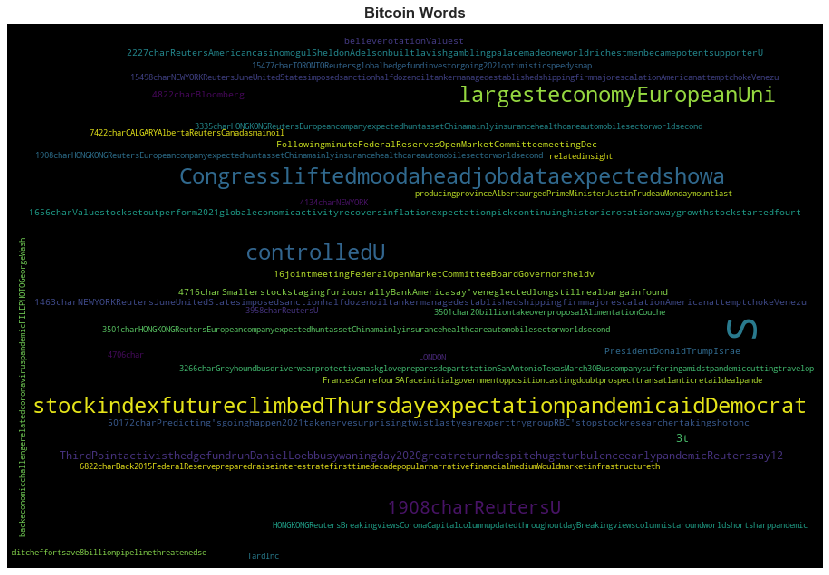

In [48]:
# Generate the Bitcoin word cloud
wc = WordCloud(width=900, height=600, max_words=100).generate("".join(ngrams_fin_sec))
plt.imshow(wc)
plt.axis("off")
fontdict={"fontsize":15, "fontweight":"bold"}
plt.title("Bitcoin Words", fontdict=fontdict)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

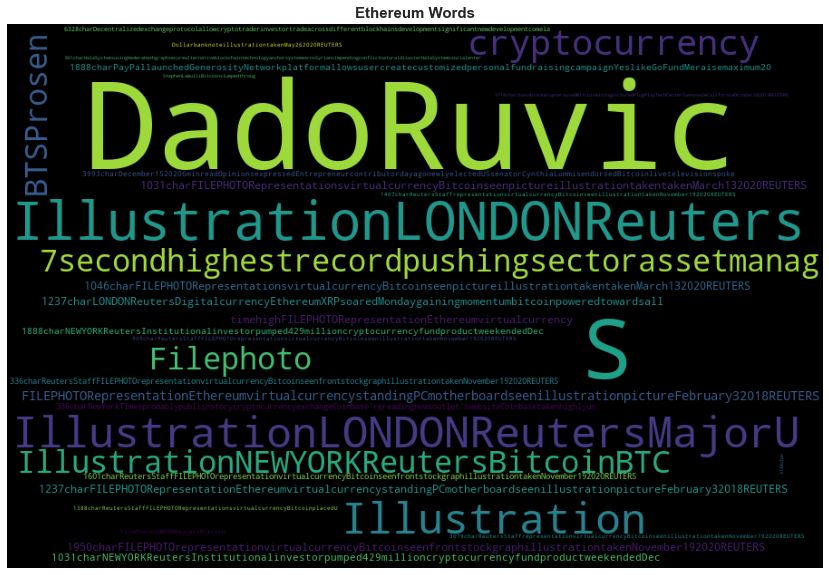

In [36]:
# Generate the Ethereum word cloud
wc = WordCloud(width=900, height=600, max_words=100).generate("".join(ngrams_ethereum))
plt.imshow(wc)
plt.axis("off")
fontdict={"fontsize":15, "fontweight":"bold"}
plt.title("Ethereum Words", fontdict=fontdict)
plt.show

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [37]:
import spacy
from spacy import displacy

In [28]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [38]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [43]:
# Concatenate all of the bitcoin text together
article = bitcoin_headlines["articles"]
bitcoin_n = " "
for i in bitcoin_headlines["articles"]:
    bitcoin_n+=str(i)
bitcoin_n

' {\'source\': {\'id\': None, \'name\': \'Lifehacker.com\'}, \'author\': \'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker\', \'title\': \'Is the New Visa Bitcoin Rewards Card Worth It?\', \'description\': \'Visa\\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless you’re extremely bullish on cryptocurrency and don’t mind getting seriously dinged fo…\', \'url\': \'https://twocents.lifehacker.com/is-the-new-visa-bitcoin-rewards-card-worth-it-1845803159\', \'urlToImage\': \'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/a2650t4nr8r2uyujbnfu.png\', \'publishedAt\': \'2020-12-03T22:00:00Z\', \'content\': \'Visa\\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extrem

In [46]:

# Run the NER processor on all of the text
doc_btc = nlp(bitcoin_n)

# Add a title to the document

doc_btc.user_data["title"] = "Bitcoin NER"

In [47]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [48]:
# List all Entities
for ent in doc_btc.ents:
    print(ent.text, ent.label_)

Lifehacker.com ORG
Mike Winters PERSON
Two Cents MONEY
Mike Winters PERSON
Lifehacker ORG
the New Visa Bitcoin Rewards Card ORG
first ORDINAL
Bitcoin GPE
2020-12-03T22:00:00Z' DATE
first ORDINAL
Bitcoin GPE
TechCrunch PERSON
Bitcoin GPE
20k MONEY
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
Bitcoin GPE
the past two months DATE
CoinMarket ORG
2020-12-16T17:12:40Z' DATE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
Gizmodo.com ORG
Rhett Jones' PERSON
Bitcoin Blows PERSON
20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
https://gizmodo.com/bitcoin-blows-past-20-000-milestone-1845894176 PRODUCT
2020-12-16T15:15:00Z' DATE
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
Alex Wilhelm' PERSON
https://techcrunch.com/wp-content/uploads/2020/05/NSussman_Techcrunch_Exchange_v3_GRY.jpg?w=533' WORK_OF_ART
2020-12-17T16:01:42Z' DATE
2020 DATE
late-year D

---

## Ethereum NER

In [50]:
# Concatenate all of the bitcoin text together
article = ethereum_headlines["articles"]
ethereum_ner = " "
for i in ethereum_headlines["articles"]:
    ethereum_ner+=str(i)
ethereum_ner

' {\'source\': {\'id\': \'reuters\', \'name\': \'Reuters\'}, \'author\': \'Tom Wilson\', \'title\': \'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK\', \'description\': \'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\', \'url\': \'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI\', \'urlToImage\': \'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800\', \'publishedAt\': \'2020-11-23T14:16:00Z\', \'content\': \'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\\r\\nLONDON (Reuters) - … [+1237 chars]\'}{\'source\': {\'id\': \'reuters\', \'name\': \'Reuters\'}, \'author\': \'Tom Wilson\', \'title\': \'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK\', \'description

In [51]:
# Run the NER processor on all of the text
doc_eth = nlp(ethereum_ner)

# Add a title to the document

doc_eth.user_data["title"] = "Ethereum NER"

In [52]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [53]:
# List all Entities
for ent in doc_eth.ents:
    print(ent.text, ent.label_)

Reuters ORG
Tom Wilson' PERSON
Reuters ORG
XRP ORG
Monday DATE
2020-11-23T14:16:00Z' DATE
February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration\r\nLONDON ORG
Reuters ORG
Reuters ORG
Tom Wilson' PERSON
Reuters ORG
XRP ORG
Monday DATE
2020-11-23T14:16:00Z' DATE
February 3, 2018 DATE
REUTERS/Dado Ruvic/Illustration\r\nLONDON ORG
Reuters ORG
Reuters ORG
Tom Wilson' PERSON
Reuters India' ORG
XRP ORG
Monday DATE
2020-11-23T14:48:00Z' DATE
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Reuters ORG
Tom Wilson' PERSON
20,000 MONEY
U.S. GPE
Wednesday DATE
bitcoin GPE
20,000 MONEY
2020-12-16T16:35:00Z' DATE
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
Reuters ORG
U.S. GPE
Reuters ORG
Tom Wilson' PERSON
20,000 MONEY
U.S. GPE
Wednesday DATE
bitcoin GPE
20,000 MONEY
2020-12-16T16:46:00Z' DATE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Dado Ruvic PERSON
Reuters ORG
U.S. GPE
Reuters ORG
Tom Wilson' PERSON
20,000 MONEY
India GPE
U.S. GPE
Wednesday DATE
bitcoin GPE
20,000 MONEY
2020-1